In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import  Input, Concatenate
import numpy as np
import os
import json

%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

In [0]:
input_token_path = '/content/gdrive/My Drive/Colab Notebooks/fr2phonetics/fr_chars.txt'
target_token_path = '/content/gdrive/My Drive/Colab Notebooks/fr2phonetics/fr_phonetic_chars.txt'

with open(input_token_path,'r', encoding='UTF8') as file:
  input_token_index = json.loads(file.read())

with open(target_token_path,'r', encoding='UTF8') as file:
  target_token_index = json.loads(file.read())

reverse_input_char_index = {i: char for i, char in enumerate(input_token_index)}
reverse_target_char_index = {i: char for i, char in enumerate(target_token_index)}

max_encoder_seq_length = 75 #don't change
max_decoder_seq_length = 75 #don't change
num_encoder_tokens = len(input_token_index)
num_decoder_tokens = len(target_token_index)
latent_dim = 64

In [0]:
def encodeText(x):
  encoder_input_data = np.zeros((len(x), max_encoder_seq_length, num_encoder_tokens),dtype='float32')
  for i, input_text in enumerate(x):
      for t, char in enumerate(input_text):
          encoder_input_data[i, t, input_token_index[char]] = 1.
      encoder_input_data[i, t + 1:, input_token_index[' ']] = 1.  
  return encoder_input_data

def showWordMatrix(matrix):
  plt.imshow(matrix*255, cmap='gray', vmin=0, vmax=255)
  plt.show()

In [0]:
def decode_sequence(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    target_seq[0, 0, target_token_index['\t']] = 1.

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        states_value = [h, c]

    return decoded_sentence

In [7]:
model = load_model("/content/gdrive/My Drive/Colab Notebooks/fr2phonetics/bidirectionnal_seq2seq_phonetics_fr_2.h5")

encoder_inputs = model.inputs[0]   # input_1
encoder_outputs, forward_h, forward_c, backward_h, backward_c = model.layers[1].output   # lstm_1
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])
encoder_states = [state_h, state_c]
encoder_model = Model(encoder_inputs, encoder_states)

decoder_inputs = model.inputs[1]   # input_2
decoder_state_input_h = Input(shape=(latent_dim*2,), name='input_3')
decoder_state_input_c = Input(shape=(latent_dim*2,), name='input_4')
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_lstm = model.layers[5]
decoder_outputs, state_h_dec, state_c_dec = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h_dec, state_c_dec]
decoder_dense = model.layers[-1]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


bleu


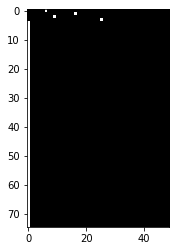

couleur


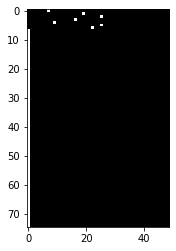

lumière


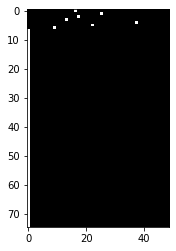

vue


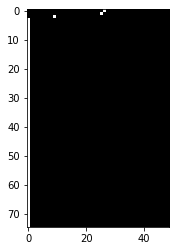

ouïe


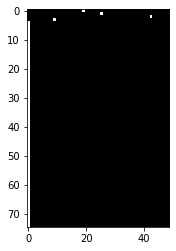

oreille interne


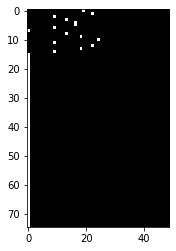

système nerveux


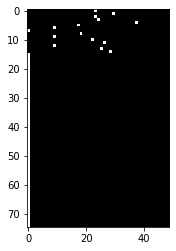

métabolisme


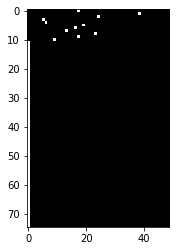

humain


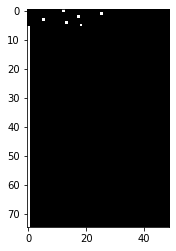

système solaire


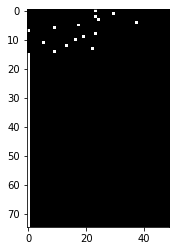

galaxie


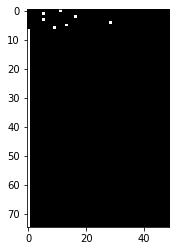

protons et neutrons


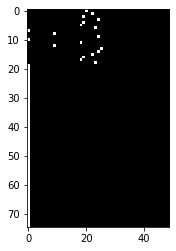

particule élémentaire


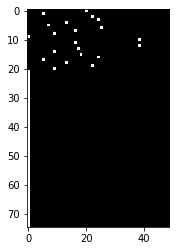

anticonstitutionnellement


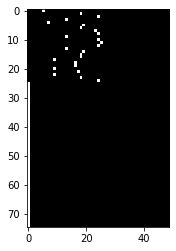


Data #1 / 14
input sentence : bleu
decoded sentence : blœ

Data #2 / 14
input sentence : couleur
decoded sentence : ku.lœʁ

Data #3 / 14
input sentence : lumière
decoded sentence : ly.mjɛʁ

Data #4 / 14
input sentence : vue
decoded sentence : vy

Data #5 / 14
input sentence : ouïe
decoded sentence : uj

Data #6 / 14
input sentence : oreille interne
decoded sentence : ɔ.ʁɛj ɛ̃.tɛʁn

Data #7 / 14
input sentence : système nerveux
decoded sentence : sis.tɛn ʁə.vɛʁ

Data #8 / 14
input sentence : métabolisme
decoded sentence : me.ta.bɔ.lism

Data #9 / 14
input sentence : humain
decoded sentence : y.mɛ̃

Data #10 / 14
input sentence : système solaire
decoded sentence : sis.tɛm sɔ.lɛʁ

Data #11 / 14
input sentence : galaxie
decoded sentence : ɡa.lak.si

Data #12 / 14
input sentence : protons et neutrons
decoded sentence : pʁɔ.tɔ̃ e nɛ.tuʁ

Data #13 / 14
input sentence : particule élémentaire
decoded sentence : paʁ.ti.kyl e.le.mɑ̃.tɛʁ

Data #14 / 14
input sentence : anticonstitutionnellement
d

In [9]:
x_temp = ["bleu","couleur", "lumière", "vue",
          "ouïe", "oreille interne", "système nerveux", "métabolisme", "humain",
          "système solaire", "galaxie", "protons et neutrons", "particule élémentaire", "anticonstitutionnellement"]

x_temp = [x_temp[i].lower() for i in range(len(x_temp))]
encoder_temp_input_data = encodeText(x_temp)

# for i, data in zip(x_temp,encoder_temp_input_data):
#   print(i)
#   showWordMatrix(data)

for seq_index in range(len(encoder_temp_input_data)):
    input_seq = encoder_temp_input_data[seq_index:seq_index+1]
    decoded_sentence = decode_sequence(input_seq)
    print()
    print('Data #{} / {}'.format(seq_index+1,len(encoder_temp_input_data)))
    print("input sentence : {}".format(x_temp[seq_index]))
    print("decoded sentence : {}".format(decoded_sentence[:-1]))